# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [2]:
# Set up the appearance of the plots
sns.set()

# Seed np.random
np.random.seed(42)

# Set up a cdf function to quickly see distributions.
def ecdf(data):
    '''Compute continuous distribution function for one column'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Set up a function to generate bootstrap replicates
def bs_reps(data, func, size=1):
    '''Draw boostrap replicates'''
    # Initialize empty array
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

In [3]:
# Check the basic stats
df.describe()
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1.  Is the distribution of body temperatures normal?

Yes.  Two tests are used below to show that the data conforms to a normal distribution.

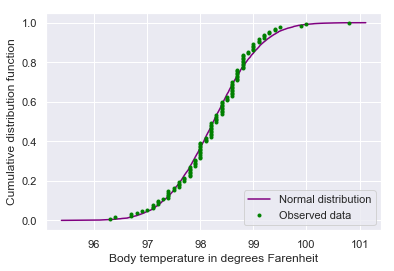

In [4]:
# Method 1: Plot ECDF over theoretical CDF 

# Get x and y points from the 
x, y = ecdf(df.temperature)
mean = np.mean(df.temperature)
std = np.std(df.temperature)
sample = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(sample)

# Plot it.
_ = plt.plot(x_theor, y_theor, color='purple')
_ = plt.plot(x, y, marker='.', linestyle='none', color='green')
_ = plt.legend(('Normal distribution', 'Observed data'), loc='lower right')
_ = plt.xlabel('Body temperature in degrees Farenheit')
_ = plt.ylabel('Cumulative distribution function')

In [5]:
# Method 2: P-value testing using scipy.stats.normaltest with alpha = .05

chisq, pval = stats.normaltest(df.temperature)

if pval < .05:
    print('Normal distribution IS NOT a good fit.  (p-value = ', pval, ')')
else:
    print('Normal distribution IS a good fit.  (p-value = ', pval, ')')

Normal distribution IS a good fit.  (p-value =  0.2587479863488254 )


# 2.  Is the sample size large? Are the observations independent?

Yes.  Per boxes 2 and 4, we see 130 rows.  130 is greater than 30, so the sample is considered large. 

Yes.  130 is less than 10% of the human population, meeting the 10% rule for independence when sampling without replacement.

# 3a.  Is the true population mean really 98.6 degrees F?

If we set H0: mean == 98.6 and Ha: mean =/= 98.6 with alpha = .05, the tests below do not support that the true mean is equal to 98.6F.

Bootstrap testing of the mean gave us a mean below the assumed population mean, and the one-sample t-test provides a p-val well below our desired .05 significance.  Both tests indicate that we should reject H0 in favor of Ha.

In [6]:
# Bootstrap test of mean

# Get several bootstrap replicates of df.temperature.
bs_replicates = bs_reps(df.temperature, np.mean, 10000)

# Print the test results.
print('Bootstrap mean = ', np.mean(bs_replicates))

Bootstrap mean =  98.24980038461538


In [7]:
# Scipy one-sample t-test

# Get t, pval from scipy.stats.ttest_1samp
t, pval = stats.ttest_1samp(df.temperature, 98.6)

print('t = ', t, '(measured in units of std err)')
print('p-val = ', '%.10f' % pval, '(very, very low)')

t =  -5.4548232923645195 (measured in units of std err)
p-val =  0.0000002411 (very, very low)


# 3b.  Would you use a one-sample or two-sample [frequentist] test? Why? 

Use a one-sample test, since we're only testing one statistic.

# 3c.  In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?

𝑡, as we are working with means rather than proportions and are using estimates.  (Although I think z is also appropriate since we have a large sample.)

# 3d.  Now try using the other test. How is the result be different? Why?

The 𝑡- and 𝑧-scores are very similar, but the p-value for the 𝑧-score is smaller by a factor of 6.  I doubt that matters when the numbers are this small.  In this case, the population mean wasn't known and 𝑧 was estimated using the sample statistics.  Technically, both scores were created with estimates.

In [8]:
# Computational z-test (for Q3d)

# Get the variables
m = np.mean(df.temperature) # mean of sample
n = len(df.temperature) # sample size
s = np.std(df.temperature) # stdev of sample
sem = s / np.sqrt(n) # sample error

# Calculate z-score and p-value
z = (m - 98.6) / sem
pval = stats.norm.cdf(z) * 2

print('z = ', z, '(measured in units of std err)')
print('p-val = ', '%.10f' % pval, '(very, very low)')

z =  -5.475925202078116 (measured in units of std err)
p-val =  0.0000000435 (very, very low)


# 4a.  Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [9]:
# Draw random sample
sample = np.random.choice(df.temperature, size=10)

# Get the t-test for the new sample
t_10, pval_t = stats.ttest_1samp(sample, 98.6)

print('t = ', t_10, '(measured in units of std err)')
print('p-val = ', '%.10f' % pval_t)

# Get the variables for the z-test
m_10 = np.mean(sample) # mean of sample
n_10 = len(sample) # sample size
s_10 = np.std(sample) # stdev of sample
sem_10 = s_10 / np.sqrt(n_10) # sample error

# Calculate z-score and p-value
z_10 = (m_10 - 98.6) / sem_10
pval_z = stats.norm.cdf(z_10) * 2

print('z = ', z_10, '(measured in units of std err)')
print('p-val = ', '%.10f' % pval_z)

t =  -1.3605380662763995 (measured in units of std err)
p-val =  0.2067549661
z =  -1.4341330442648481 (measured in units of std err)
p-val =  0.1515342997


# 4b.  Which one is the correct one to use?

# 4c.  What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

To be perfectly honest, I can't answer either of these questions.  Every time I rerun the block of code, 'sample' becomes a different array.  The 𝑡 and 𝑧 values (and thus the associated p-values) change wildly.  Both tests tell me to fail to reject H0 and to reject H0 at various times.  

I looked for other examples on the internet.  The examples I found ran the sample once and made conclusions from that one array.  I emphatically believe this is the wrong way about things and that this question is designed to point out that small samples don't mean much at all.

# 5.  At what temperature should we consider someone's temperature to be "abnormal"?

First of all, "abnormal" hasn't been defined.  Is abnormal a fever?  A symptom of a thyroid condition?  Just outside the bounds?  Without definition, I cannot make this determination.

As calculated below, we show a 95% confidence that the "average" body temperature will fall between approximately 98.1 and 98.4 degrees F.  

A single person's temperature may not fall into our interval at all.  The 95% prediction interval says that a single instance will probably fall between approximately 96.8 and 99.7 degrees F.  This is why a fever is defined for practical use as a temperature over 100.4 degrees F.

In [10]:
# Create a margin of error calculation for 95%, 2-tailed confidence level z-stat
z_crit = stats.norm.ppf(.975)
margin_error = z_crit * sem # error used for population
margin_error_single = z_crit * s # stdev used for single instance
print('Calculated margin of error for the population:', margin_error)
print('Calculated margin of error for a single person:', margin_error_single)
print()

# Check the confidence intervals for the population as a whole
print('95% confidence intervals for the mean of the population:')
bootstrap_ci = np.percentile(bs_replicates, [2.5, 97.5])
t_ci = stats.t.interval(0.95, len(df.temperature)-1, loc=np.mean(df.temperature), scale=stats.sem(df.temperature))
z_ci = stats.norm.interval(0.95, loc=np.mean(df.temperature), scale=stats.sem(df.temperature))
print('Bootstrap CI:\t', bootstrap_ci[0], ',', bootstrap_ci[1])
print('𝑡 CI:\t\t', t_ci[0], ',', t_ci[1])
print('𝑧 CI:\t\t', z_ci[0], ',', z_ci[1])
print()

# Check the confidence interval for an individual (prediction interval)
z_pi = stats.norm.interval(0.95, loc=np.mean(df.temperature), scale=np.std(df.temperature))
print('95% prediction interval for an individual temperature entry:')
print('𝑧 PI:\t\t', z_pi[0], ',', z_pi[1])

Calculated margin of error for the population: 0.12554865777413815
Calculated margin of error for a single person: 1.4314749424825415

95% confidence intervals for the mean of the population:
Bootstrap CI:	 98.12153846153845 , 98.37692307692308
𝑡 CI:		 98.12200290560804 , 98.37645863285351
𝑧 CI:		 98.12319642818166 , 98.3752651102799

95% prediction interval for an individual temperature entry:
𝑧 PI:		 96.81775582674824 , 99.68070571171332


C:\Users\Misty\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


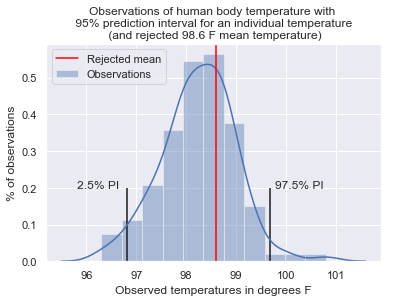

In [11]:
# Plot the distribution and 98.6, with CI markers
_ = sns.distplot(df.temperature, bins=int(np.sqrt(130)))
_ = plt.xlabel('Observed temperatures in degrees F')
_ = plt.ylabel('% of observations')
_ = plt.axvline(x=98.6, color='red')
_ = plt.legend(('Rejected mean', 'Observations'), loc='upper left')
# Add text and lines marking the 95% prediction interval:
_ = plt.text(x=z_pi[0]-1, y=.2, s='2.5% PI')
_ = plt.vlines(ymin=0, ymax=.2, x=z_pi[0])
_ = plt.text(x=z_pi[1]+.1, y=.2, s='97.5% PI')
_ = plt.vlines(ymin=0, ymax=.2, x=z_pi[1])
_ = plt.title('Observations of human body temperature with \n 95% prediction interval for an individual temperature \n (and rejected 98.6 F mean temperature)')

# 6.  Is there a significant difference between males and females in normal temperature?

We'll set H0: difference of means == 0 and Ha: difference of means =/= 0 with an alpha = .05.  Using scipy.stats.ttest_ind, a t-test designed for two independent samples, we obtain a p-value of 0.024.  Based on this, we must reject H0 in favor of Ha -- female body temperatures and male body temperatures are not statistically equal.

Once you look at the plots, it's quite obvious that at least one person came in with a qualifying fever.  If that value is removed, the p-value of the difference of means is around 0.41, so we would still reject H0.

In [12]:
# Determine the population statistics
female = df.temperature.loc[df.gender == 'F']
male = df.temperature.loc[df.gender == 'M']

m_female = np.mean(female) # mean of sample
n_female = len(female) # sample size
s_female = np.std(female) # stdev of sample
sem_female = s_female / np.sqrt(n_female) # sample error

m_male = np.mean(male) # mean of sample
n_male = len(male) # sample size
s_male = np.std(male) # stdev of sample
sem_male = s_male / np.sqrt(n_male) # sample error

In [13]:
# Bootstrap tests of mean

# Get several bootstrap replicates for female readings.
bs_replicates_female = bs_reps(female, np.mean, 10000)
# Print the test results.
print('Bootstrap mean (female) = ', np.mean(bs_replicates_female))

# Get several bootstrap replicates of df.temperature.
bs_replicates_male = bs_reps(male, np.mean, 10000)
# Print the test results.
print('Bootstrap mean (male) = ', np.mean(bs_replicates_male))

# Get the CIs while we're at it
bootstrap_ci_female = np.percentile(bs_replicates_female, [2.5, 97.5])
print('Bootstrap CI (female):\t', bootstrap_ci_female[0], ',', bootstrap_ci_female[1])
bootstrap_ci_male = np.percentile(bs_replicates_male, [2.5, 97.5])
print('Bootstrap CI (male):\t', bootstrap_ci_male[0], ',', bootstrap_ci_male[1])

Bootstrap mean (female) =  98.39299523076923
Bootstrap mean (male) =  98.10407923076923
Bootstrap CI (female):	 98.21384615384615 , 98.56923076923077
Bootstrap CI (male):	 97.9353846153846 , 98.27384615384615


In [14]:
# Run a scipy t-test for teo independent populations
t_2, pval_2 = stats.ttest_ind(female, male)

print('t = ', t_2, '(measured in units of std err)')
print('p-val = ', '%.10f' % pval_2, '(very small)')

t =  2.2854345381656103 (measured in units of std err)
p-val =  0.0239318831 (very small)


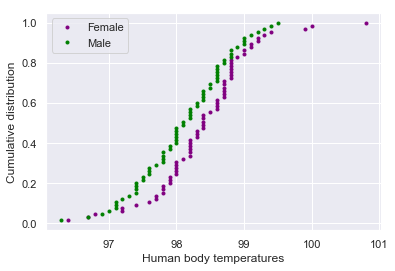

In [15]:
# Plot female and male ecdfs
xf, yf = ecdf(female)
xm, ym = ecdf(male)

_ = plt.plot(xf, yf, marker='.', linestyle='none', color='purple')
_ = plt.plot(xm, ym, marker='.', linestyle='none', color='green')
_ = plt.xlabel('Human body temperatures')
_ = plt.ylabel('Cumulative distribution')
_ = plt.legend(('Female', 'Male'))

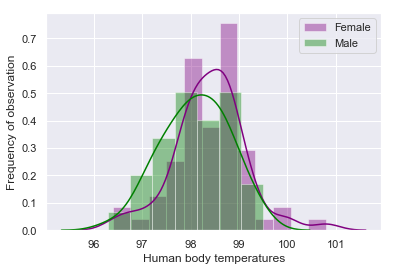

In [16]:
# Plot something else
_ = sns.distplot(female, color='purple')
_ = sns.distplot(male, color='green')
_ = plt.xlabel('Human body temperatures')
_ = plt.ylabel('Frequency of observation')
_ = plt.legend(('Female', 'Male'))